In [53]:
import os, glob
import xarray as xr
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
os.environ["PROJ_LIB"] = "C:/Users/Holdenje/Documents/R/win-library/3.5/sf/proj"
from mpl_toolkits.basemap import Basemap
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

filepath = "C:/Users/Holdenje/DRIFT/projects/MLDPn/"
filename = "2020120700_000.csv"

bbox_lats = [49.0, 48.0, 48.0, 49.0, 49.0]
bbox_lons = [-51.0, -51.0, -52.2, -52.2, -51.0]

file = os.path.join(filepath, filename)

In [56]:
df = pd.read_csv(file)
all_lats = df.Latitude.values
all_lons = df.Longitude.values

drifterIDs = np.unique(df['drifter ID'].values)

C:\Users\Holdenje\AppData\Local\conda\conda\envs\opendrift_update\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


plotting  CIOPS_test
plotting  CIOPS_test_2
plotting  CIOPS_test_3
plotting  CIOPS_test_4


C:\Users\Holdenje\AppData\Local\conda\conda\envs\opendrift_update\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


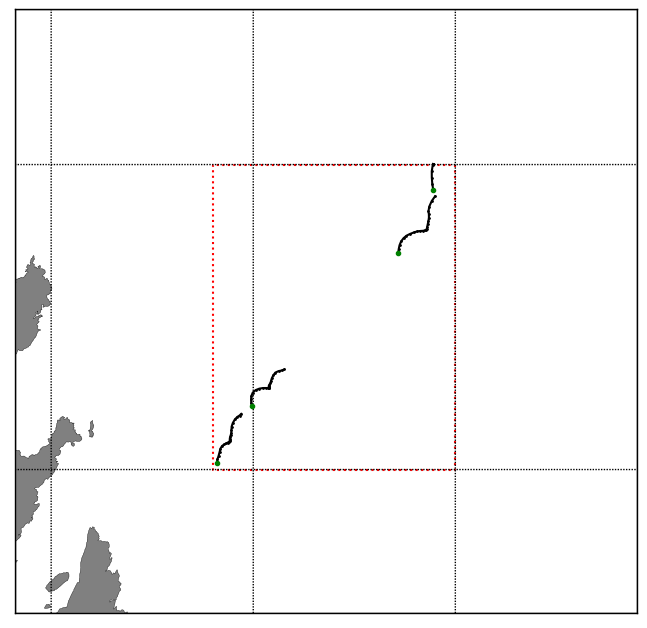

In [55]:
fig, ax = plt.subplots(1,1,figsize=(15,8))
map = Basemap(
        projection='merc', 
        llcrnrlon=np.nanmin(all_lons)-1, 
        urcrnrlon=np.nanmax(all_lons)+1, 
        llcrnrlat=np.nanmin(all_lats)-0.5, 
        urcrnrlat=np.nanmax(all_lats)+0.5, 
        resolution='f', 
        ax=ax
        )
plt.show()

for ID in drifterIDs:
    dfuse = df[df['drifter ID'] == ID]
    lats = dfuse.Latitude.values
    lons = dfuse.Longitude.values
    x,y = map(lons, lats)
    map.plot(x, y, 'k.', zorder = 2, markersize=2)
    map.plot(x, y, 'k', zorder = 3)
    map.plot(x[0], y[0], 'g.', zorder=4)

bx, by = map(bbox_lons, bbox_lats)
map.plot(bx, by, 'r:', zorder=1)
    
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='white')
map.drawmapboundary(fill_color='white')
map.drawmeridians(np.arange(0,360,1))
map.drawparallels(np.arange(-90,90,1))

plt.show()